In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import os
import subprocess
import cv2 
from PIL import Image 

#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/Coding"
import sys
sys.path.insert(1, My_Package_PATH)
import OneD.WaveNonDim as ND
import OneD.NBody as NB
import OneD.GlobalFuncs as GF

#Set up Directory for saving files/images/videos
# Will not rename this again
dirExtension = "1D_Codes/Non-Dim/Analysis"
Directory = os.getcwd()#+"/"+dirExtension #os.curdir() #"/home/boris/Documents/Research/Coding/1D codes/Non-Dim"
print(Directory)

############################################
# SET UP: shared by Wave and N-Body scenarios
############################################
#Set scales and parameters:
L_s = 1 #kpc
v_s = 1 #100km/s
G = 1
hbar = 1

print(f"Length scale L = {L_s}")
print(f"Velocity scale v = {v_s}")

T = L_s/v_s
print(f"Time scale T = {T}")

M_s = L_s*v_s**2
print(f"Mass scale M = {M_s}")

#L, choice = GF.Startup_Choice()
L, mu, Num_bosons, r, sigma, Num_stars = GF.StartupV2(hbar, L_s, v_s)
m = mu*M_s

#Set up Grid
L = L*L_s #new length. Length of the box
N = 10**3
z = np.linspace(-L/2,L/2,N)
dz = z[1]-z[0]

################
#PROMPT FOR FULL SIMULATION OR SNAPSHOTS
print("")
print("Do you want the full simulation [1] or snapshots [2]? Choose [1/2]")
sim_choice2 = int(input())
print("")

#For te
################

# #SET UP FOLDERS:
# if sim_choice2 == 1: 
#     folder_name = f"FuzzyMass{m}_Images"
#     if Num_bosons == 0:
#         folder_name = "ParticlesOnly_Images"
#     elif Num_stars == 0:
#         folder_name = f"OnlyFuzzyMass{m}_Images"
# elif sim_choice2 == 2:
#     folder_name = f"FuzzyMass{m}_Snapshots"
#     if Num_bosons == 0:
#         folder_name = "ParticlesOnly_Snapshots"
#     elif Num_stars == 0:
#         folder_name = f"OnlyFuzzyMass{m}_Snapshots"

# #print(os.path.exists(dirExtension+"/"+folder_name))
# if os.path.exists(dirExtension+"/"+folder_name) == True:
#     for file in os.listdir(Directory+"/"+folder_name):
#         os.remove(Directory+"/"+folder_name+"/"+file)
#     os.rmdir(Directory+"/"+folder_name)    
# os.mkdir(Directory+"/"+folder_name)

#RUN SIMULATION/CALCULATION
print("Calculating and Plotting...")
folder_name = "bla" 
stars, chi = GF.run_FDM_n_Bodies(sim_choice2, z,L,dz,mu, Num_bosons, r, sigma,Num_stars,v_s,L_s,Directory,folder_name, absolute_PLOT = False)
print("Calculation and Plotting Done. Now Saving Video...")

np.savetxt(f"Stars_Pos_m{m}.csv",[star.x for star in stars], delimiter = ",")
np.savetxt(f"Stars_Vel_m{m}.csv",[star.v for star in stars], delimiter = ",")
np.savetxt(f"Chi_m{m}.csv", chi)


/home/boris/Documents/Research/Coding/1D_Codes/Non-Dim/Analysis
Length scale L = 1
Velocity scale v = 1
Time scale T = 1.0
Mass scale M = 1

Choose a (non-dimensional) box length:


KeyboardInterrupt: Interrupted by user

In [3]:
np.savetxt("Stars_Pos.csv",[star.x for star in stars], delimiter = ",")
np.savetxt("Stars_Vel.csv",[star.v for star in stars], delimiter = ",")
np.savetxt("Chi.csv", chi)

NameError: name 'stars' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import os
import subprocess
import cv2 
from PIL import Image 

#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/Coding"
import sys
sys.path.insert(1, My_Package_PATH)
import OneD.WaveNonDim as ND
import OneD.NBody as NB
import OneD.GlobalFuncs as GF

#Set up Directory for saving files/images/videos
# Will not rename this again
dirExtension = "1D_Codes/Non-Dim/Analysis"
Directory = os.getcwd()#+"/"+dirExtension #os.curdir() #"/home/boris/Documents/Research/Coding/1D codes/Non-Dim"
print(Directory)

import scipy as sci

stars_x = np.loadtxt("Stars_Pos.csv", dtype = float, delimiter=",")
stars_v = np.loadtxt("Stars_Vel.csv", dtype = float, delimiter=",")
chi = np.loadtxt("Chi.csv", dtype = complex, delimiter=",")

/home/boris/Documents/Research/Coding/1D_Codes/Non-Dim/Analysis


In [3]:
import scipy.optimize as opt

In [4]:
L = 2
N = 10**3
z = np.linspace(-L/2,L/2,N)
dz = z[1]-z[0]

#rescale wavenumber k to velocity v:
k = 2*np.pi*np.fft.fftfreq(len(z),dz)
hbar = 1
v = k*(hbar/m)
x_min, x_max = np.min(z), np.max(z)
v_min, v_max = np.min(v), np.max(v)


#Calculate Particle distribution on Mesh
stars = [NB.star(i,sigma,stars_x[i],stars_v[i]) for i in range(len(stars_x))]
grid_counts = NB.grid_count(stars,L,z)
rho_part = (grid_counts/dz)*sigma 
#Add the density from the FDM
rho_FDM = np.absolute(chi)**2 
rho = rho_FDM + rho_part

layout = [['upper left', 'upper right', 'far right'],
        ['lower left', 'lower right', 'far right']]

fig, ax = plt.subplot_mosaic(layout, constrained_layout = True)
fig.set_size_inches(20,10)
#plt.suptitle("Time $\\tau = $" +f"{round(dtau*i,5)}".zfill(5), fontsize = 20)    

##############################################3
#ACCELERATIONS
Part_force = -GF.fourier_gradient(GF.fourier_potentialV2(rho_part,L),L)
FDM_force = -GF.fourier_gradient(GF.fourier_potentialV2(rho_FDM,L),L)
a1 = np.abs([np.max(Part_force),np.min(Part_force)])
a2 = np.abs([np.max(FDM_force),np.min(FDM_force)])
a_max = np.max(np.append(a1,a2))*2
ax['far right'].plot(z, Part_force, label = "Particle Contribution")
ax['far right'].plot(z, FDM_force, label = "FDM Contribution")
ax['far right'].set_ylim(-a_max,a_max)
ax['far right'].set_title("Force contributions",fontsize = 15)
ax['far right'].legend(fontsize = 20)

# THE FDM
#ax['upper left'].plot(z,chi.real, label = "Re[$\\chi$]")
#ax['upper left'].plot(z,chi.imag, label = "Im[$\\chi$]")
#rho_FDM = np.abs(chi)**2 #already calculated this
phi_FDM = GF.fourier_potentialV2(rho_FDM,L)
ax['upper left'].plot(z,phi_FDM,label = "$\\Phi_{FDM}$ [Fourier perturbation]")
ax['upper left'].plot(z,rho_FDM,label = "$\\rho_{FDM} = \\chi \\chi^*$")
#ax['upper left'].set_ylim([-y00_max, y00_max] )
ax['upper left'].set_xlabel("$z = x/L$")
ax['upper left'].legend(fontsize = 15)
ax['upper left'].set_title("Non-Dimensional Densities and Potentials",fontsize = 15)

#PHASE SPACE CALCULATION:
#Don't calculate if sim_choice1 == '2'
eta = 0.05*L*r**0.5 #resolution for Husimi
k = 2*np.pi*np.fft.fftfreq(len(z),dz)
#rescale wavenumber k to velocity v:
hbar = 1
v = k*(hbar/m)
x_min, x_max = np.min(z), np.max(z)
v_min, v_max = np.min(v), np.max(v)
F = ND.Husimi_phase(chi,z,dz,L,eta)
max_F = np.max(F)/2
ax['upper right'].imshow(F,extent = (x_min,x_max,v_min,v_max),cmap = cm.hot, norm = Normalize(0,max_F), aspect = (x_max-x_min)/(2*v_max))
ax['upper right'].set_xlim(x_min,x_max)
#ax['upper right'].set_ylim(-y01_max,y01_max) #[v_min,v_max])
ax['upper right'].set_xlabel("$z = x/L$")
ax['upper right'].set_title("Phase Space Distributions", fontsize = 15)
    
##############################################3
# THE PARTICLES
#rho_part = (grid_counts/dz)*sigma #already calculated this
phi_part = GF.fourier_potentialV2(rho_part,L)
ax['lower left'].plot(z,phi_part,label = "$\\Phi_{Particles}$ [Fourier perturbation]")
ax['lower left'].plot(z,rho_part,label = "$\\rho_{Particles}$")
#ax['lower left'].set_xlim(-L/2,L/2)
#ax['lower left'].set_ylim(-y10_max,y10_max)
ax['lower left'].legend(fontsize = 15)

#Plot the Phase Space distribution
x_s = np.array([star.x for star in stars])
v_s = np.array([star.v for star in stars])
ax['lower right'].scatter(x_s,v_s,s = 1,label = "Particles")
#ax['lower right'].set_ylim(-y11_max,y11_max)
ax['lower right'].set_xlim(-L/2,L/2)
ax['lower right'].legend(fontsize = 15)

#ADDITIONAL:
#PLOT STAR CENTER OF MASS
if Num_stars != 0:#only calculate if there are stars
    centroid_z = 0
    for j in range(len(grid_counts)):
        centroid_z += z[j]*grid_counts[j]
    centroid_z = centroid_z / Num_stars
    ax['lower right'].scatter(centroid_z,0,s = 100,c = "r",marker = "o")
plt.show()


NameError: name 'm' is not defined

In [5]:
def fit_func(z,*pars):
    C = pars[0]
    a = pars[1]
    return C/(z*(z+a)**2)

#Find center of distribution / max value and index:
i = 0
max_bool = False
while max_bool == False:
    for j in range(len(rho)):
        if rho[j] > rho[i]: #if you come across an index j that points to a larger value..
            #then set i equal to j
            i = j 
            #break
        else:
            max_index = i
            max_bool = True

max_rho = rho[max_index]


print(max_rho,max_index)
i = max_index
z = z-z[i]
z_left = z[0:i]
z_right = z[i:]
rho_left = rho[0:i]
rho_right = rho[i:]

rho_avgd = (rho_left[len(rho_left)-len(rho_right):][::-1]+rho_right)/2
rho_avgd = np.append(rho_avgd, rho_left[0:len(rho_left)-len(rho_right)][::-1])
fig = plt.figure()
plt.plot(z_right,rho_right)
plt.plot(z_left,rho_left)
plt.plot(z[i],rho[i], "ro")
plt.show()
###################################################

fig,ax = plt.subplots(2,1,figsize = (10,15))
guess_params = [1,1]
popt,pcov = opt.curve_fit(fit_func,-z_left[::-1],rho_avgd,guess_params)
fit_rho = fit_func(-z_left[::-1],*popt)
ax[0].plot(-z_left[::-1],rho_avgd)
ax[0].plot(-z_left[::-1],fit_rho,'r--',label="Curve Fit")
ax[0].set_xlim(-0.1,1.5)#L/2)
ax[0].text(L/4,max(rho_avgd)*3/4, "$f(|z|) = \\frac{C}{|z|(|z|+a)^2}$",fontsize = 30)
ax[0].text(L/8-0.1,max(rho_avgd)*1/2, f"[C, a] = [{popt[0]}, {popt[1]}]",fontsize = 15)
ax[0].legend(fontsize = 30)

residuals = fit_rho-rho_avgd
ax[1].plot(-z_left[::-1],residuals,"r.--")
ax[1].set_xlim(-0.1,1.5)#L/2)
#ax[1].legend()

plt.show()

#re-try
def new_fit_func(z,*pars):
    a0,a1,a2 = pars
    og = a0/(z*(z+a1)**2)
    correction = -a2/z
    return og - correction

fig,ax = plt.subplots(2,1,figsize = (10,15))
guess_params = [1,1,0]
popt,pcov = opt.curve_fit(new_fit_func,-z_left[::-1],rho_avgd,guess_params)
fit_rho = new_fit_func(-z_left[::-1],*popt)
ax[0].plot(-z_left[::-1],rho_avgd)
ax[0].plot(-z_left[::-1],fit_rho,'r--',label="Curve Fit")
ax[0].set_xlim(-0.1,1.5)#L/2)
ax[0].text(L/4,max(rho_avgd)*3/4, "$f(|z|) = \\frac{a0}{|z|(|z|+a1)^2} - a2/|z|$",fontsize = 30)
ax[0].text(L/8-0.1,max(rho_avgd)*1/2, f"[a0, a1, a2] = {popt}",fontsize = 15)
ax[0].legend(fontsize = 30)

residuals = (fit_rho-rho_avgd)#/(fit_rho+rho_avgd)
ax[1].plot(-z_left[::-1],residuals,"r.--")
ax[1].set_xlim(-0.1,1.5)#L/2)
#ax[1].legend()

plt.show()


def new_new_fit_func(z,*pars):
    a0,a1,a2 = pars
    og = a0/((z**a2) * (z+a1)**2)
    #correction = -a2/z
    return og #- correction

fig,ax = plt.subplots(2,1,figsize = (10,15))
guess_params = [1,1,0]
popt,pcov = opt.curve_fit(new_new_fit_func,-z_left[::-1],rho_avgd,guess_params)
fit_rho = new_new_fit_func(-z_left[::-1],*popt)
ax[0].plot(-z_left[::-1],rho_avgd)
ax[0].plot(-z_left[::-1],fit_rho,'r--',label="Curve Fit")
ax[0].set_xlim(-0.1,1.5)#L/2)
ax[0].text(L/4,max(rho_avgd)*3/4, "$f(|z|) = \\frac{a0}{|z|^{a_2 }(|z|+a1)^2}$",fontsize = 30)
ax[0].text(L/8-0.1,max(rho_avgd)*1/2, f"[a0, a1, a2] = {popt}",fontsize = 15)
ax[0].legend(fontsize = 30)

residuals = (fit_rho-rho_avgd)#/(fit_rho+rho_avgd)
ax[1].plot(-z_left[::-1],residuals,"r.--")
ax[1].set_xlim(-0.1,1.5)#L/2)
#ax[1].legend()

plt.show()

###################################################

fit_rho = np.append(fit_rho[::-1],fit_rho)
fit_phi = GF.fourier_potentialV2(fit_rho,L)
fit_z = np.linspace(-L/2,L/2,len(fit_phi))
plt.plot(fit_z,fit_phi,label = "Analytic Model")
rho = np.append(rho_left,rho_right)
plt.plot(z,GF.fourier_potentialV2(rho,L), label = "Exact NBody Potential")
plt.legend()
plt.show()


NameError: name 'rho' is not defined

In [6]:

fig = plt.figure()
plt.plot(np.log(np.abs(z_left)),np.log(rho_left), "r-", label = "$z \\in [-L/2,0]$")
plt.plot(np.log(np.abs(z_right)),np.log(rho_right), 'b-', label = "$z \\in [0,L/2]$")
plt.legend()
plt.xlabel("$log|z|$")
plt.ylabel("$log|\\rho|$")
plt.show()

plt.plot(np.log(-z_left[::-1]),np.log(rho_avgd))
plt.legend()
plt.xlabel("$log|z|$")
plt.ylabel("$log|\\rho|$")
plt.show()



#ADDITIONAL:
#Calculate potential 
phi = GF.fourier_potentialV2(rho,L)
#Calculate Acceleration Field on Mesh:
a_grid = NB.acceleration(phi,L) 



NameError: name 'z_left' is not defined

<Figure size 432x288 with 0 Axes>

0.24124124124124124


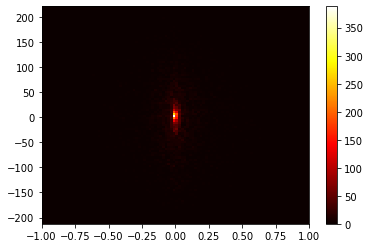

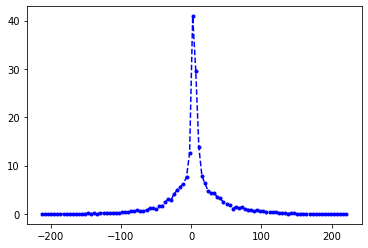

In [7]:
#hist, xedges, yedges = np.histogram2d(stars_x,stars_v,bins = [50,50])
#plt.imshow(hist,extent = (x_min,x_max,v_min,v_max), cmap = cm.hot, aspect = (x_max-x_min)/(v_max-v_min))
#plt.show()

#Re-center the system
z = np.linspace(-L/2,L/2,N)
max_index = 620
print(z[max_index])
stars_x_new = stars_x - z[max_index] #centroid_z

nbins = 100
hist, xedges, yedges, image = plt.hist2d(stars_x_new, stars_v, 
                            bins = [nbins,nbins], 
                            range = [[-L/2, L/2],[np.min(stars_v),np.max(stars_v)]],
                            #cmax = 250,
                            cmap = cm.hot)
plt.colorbar()
plt.show()

# print(hist)
# for i in range(len(hist)):
#     for j in range(len(hist)):
#         hist[i,j] = int(hist[i,j])
# print(hist)

def Abel(x_range: tuple, v_range: tuple,f):
    # f is a 2d-array. (A 2d histogram)

    x_min,x_max = x_range
    #v_min,v_max = v_range
    
    n_rows,n_cols = np.shape(f)

    #v_s = np.linspace(v_min,v_max,n_rows)
    x_s = np.linspace(x_min,x_max,n_cols)

    #dv = v_s[1]-v_s[0]
    dx = x_s[1]-x_s[0]

    holder = np.array([])
    for i in range(n_rows):
        #v = v_s[i]
        sum = 0
        for j in range(n_cols):
            #x = dx*j #x_s[j]. Note we only add up from x=0 to x->inf
            sum+= f[i][j]*dx
            
            # r = np.sqrt(v**2+x**2)
            # dr = np.sqrt(dv**2+dx**2)
            #
            # term1 = f[i][j]*r
            # term2 = np.sqrt(r**2-v**2)
            # sum+=dr*term1/term2
        holder = np.append(holder,sum)#2*sum)
    return holder

np.savetxt("hist.csv",hist,fmt ='%i',delimiter = ",")
hist = np.loadtxt("hist.csv",dtype = int,delimiter = ',')
v_min,v_max = np.min(stars_v),np.max(stars_v)
abel_transform = Abel((-L/2,L/2),(v_min,v_max),hist)

#print(abel_transform)
v_array = np.linspace(v_min,v_max,len(abel_transform))
plt.plot(v_array,abel_transform,'b--',marker = '.')
plt.show() 


z = 1.5
div = 1.0, remainder = 0.5
new z = -0.5
 


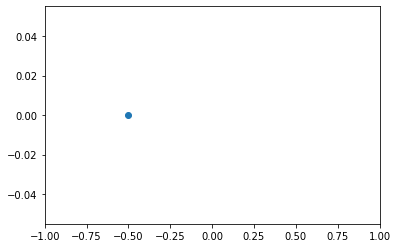

z = -0.4
div = -1.0, remainder = 0.6
new z = -0.4
 


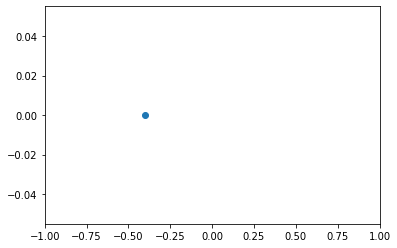

z = -0.30000000000000004
div = -1.0, remainder = 0.7
new z = -0.30000000000000004
 


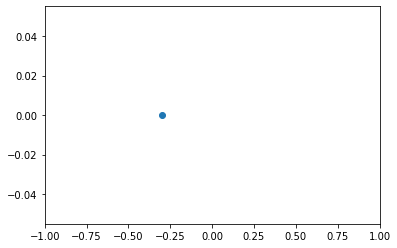

z = -0.20000000000000004
div = -1.0, remainder = 0.7999999999999999
new z = -0.20000000000000007
 


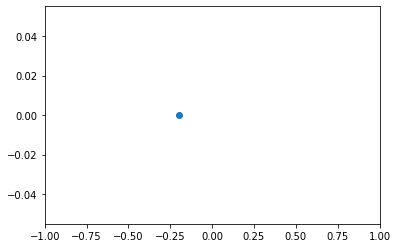

z = -0.10000000000000006
div = -1.0, remainder = 0.8999999999999999
new z = -0.10000000000000009
 


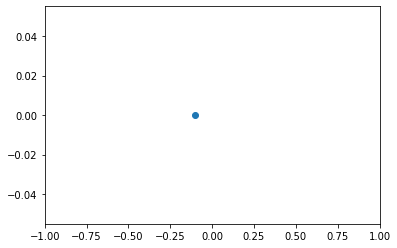

z = -8.326672684688674e-17
div = -1.0, remainder = 0.9999999999999999
new z = -1.1102230246251565e-16
 


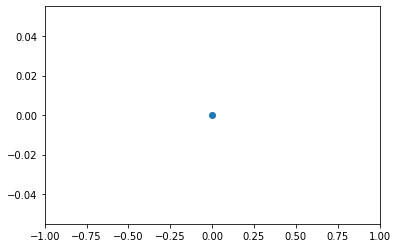

z = 0.0999999999999999
div = 0.0, remainder = 0.0999999999999999
new z = 0.0999999999999999
 


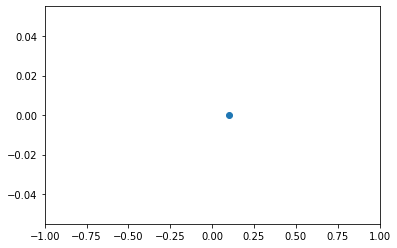

z = 0.1999999999999999
div = 0.0, remainder = 0.1999999999999999
new z = 0.1999999999999999
 


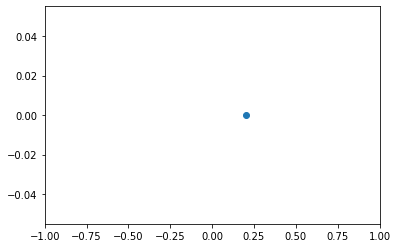

z = 0.29999999999999993
div = 0.0, remainder = 0.29999999999999993
new z = 0.29999999999999993
 


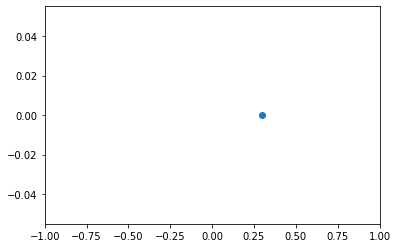

z = 0.3999999999999999
div = 0.0, remainder = 0.3999999999999999
new z = 0.3999999999999999
 


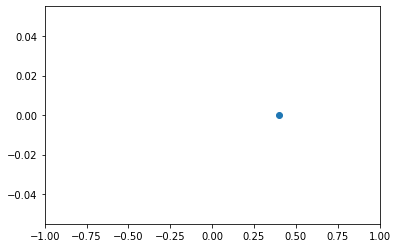

z = 0.4999999999999999
div = 0.0, remainder = 0.4999999999999999
new z = 0.4999999999999999
 


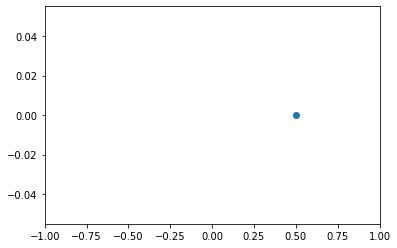

z = 0.5999999999999999
div = 0.0, remainder = 0.5999999999999999
new z = 0.5999999999999999
 


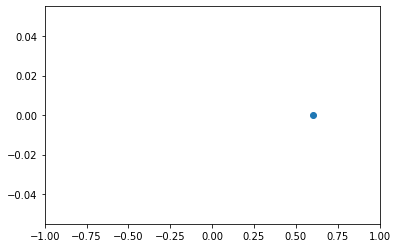

z = 0.6999999999999998
div = 0.0, remainder = 0.6999999999999998
new z = 0.6999999999999998
 


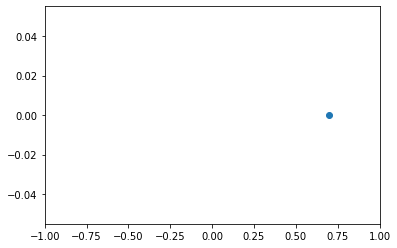

z = 0.7999999999999998
div = 0.0, remainder = 0.7999999999999998
new z = 0.7999999999999998
 


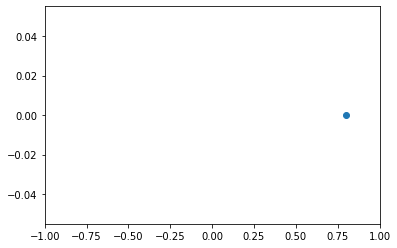

z = 0.8999999999999998
div = 0.0, remainder = 0.8999999999999998
new z = 0.8999999999999998
 


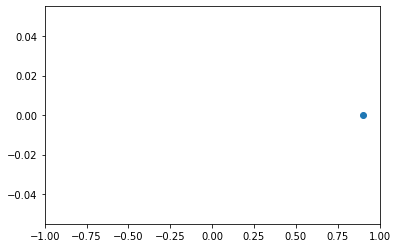

z = 0.9999999999999998
div = 0.0, remainder = 0.9999999999999998
new z = 0.9999999999999998
 


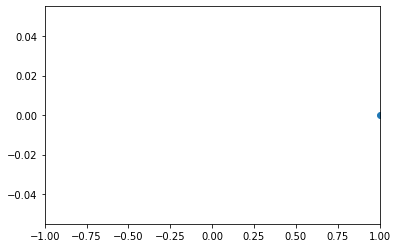

z = 1.0999999999999999
div = 1.0, remainder = 0.09999999999999987
new z = -0.9000000000000001
 


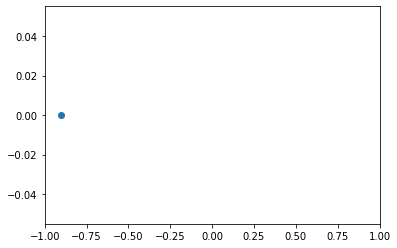

z = -0.8000000000000002
div = -1.0, remainder = 0.19999999999999984
new z = -0.8000000000000002
 


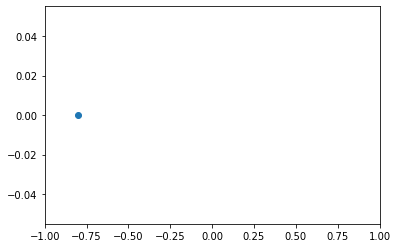

z = -0.7000000000000002
div = -1.0, remainder = 0.2999999999999998
new z = -0.7000000000000002
 


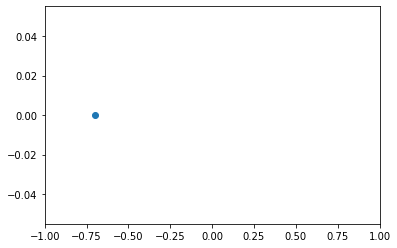

z = -0.6000000000000002
div = -1.0, remainder = 0.3999999999999998
new z = -0.6000000000000002
 


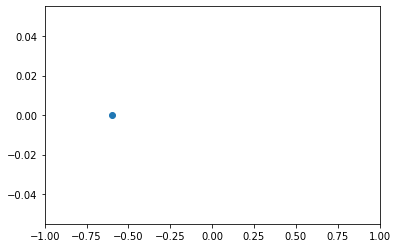

In [11]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/Coding"
import sys
sys.path.insert(1, My_Package_PATH)
import OneD.WaveNonDim as ND
import OneD.NBody as NB

L = 2
star = NB.star(1,1,1.5,1)
dt = 0.1
t_stop = 2
time = 0
while time < t_stop:
    star.reposition(L)
    
    plt.scatter(star.x,0)
    plt.xlim(-L/2,L/2)
    plt.show()
    star.x += dt*star.v

    time += dt
